In [1]:
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.eng_config import Config
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [2]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

# Chuẩn bị dữ liệu

**Thử nghiệm với n_mfcc = 26**

In [3]:
n_mfcc = 26
train_file_path, test_file_path, val_file_path = get_n_mfcc_paths(n_mfcc, Config)
x_traincnn, y_train, x_valcnn, y_val, x_testcnn, y_test, scaler = DataUtils.prepare_data(train_file_path, test_file_path, val_file_path)

# Huấn luyện mô hình

In [4]:
model = CnnModelUsingFeatureStatistics((x_traincnn.shape[1], 1), 7)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-13 18:44:38.135 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 310, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 310, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │           

In [5]:
history = model.train_model(x_traincnn, y_train, x_valcnn, y_val, f'cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc', patience_early_stop=6, patience_lr_reduction=3, factor=0.5, epochs=50, batch_size=32, learning_rate=0.0001)

Epoch 1/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.4598 - loss: 1.6006 - val_accuracy: 0.6187 - val_loss: 1.0111 - learning_rate: 1.0000e-04
Epoch 2/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.6121 - loss: 1.0480 - val_accuracy: 0.6382 - val_loss: 0.9561 - learning_rate: 1.0000e-04
Epoch 3/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.6619 - loss: 0.9027 - val_accuracy: 0.6412 - val_loss: 0.9425 - learning_rate: 1.0000e-04
Epoch 4/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7005 - loss: 0.7950 - val_accuracy: 0.6580 - val_loss: 0.9230 - learning_rate: 1.0000e-04
Epoch 5/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7273 - loss: 0.7264 - val_accuracy: 0.6505 - val_loss: 0.9310 - learning_rate: 1.0000e-04
Epoch 6/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7512 - loss: 0.6668 - val_accuracy: 0.6502 - val_loss: 0.9473 - learning_rate: 1.0000e-04
Epoch 7/50
842/842 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/ste

In [6]:
model = ModelUtilities.load_model(f'cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc.keras')

In [7]:
ModelUtilities.evaluate_model(model, x_testcnn, y_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6420 - loss: 1.0528
Test Accuracy: 0.6521223187446594


(1.0021305084228516, 0.6521223187446594)

In [8]:
history

In [9]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.5280635952949524, 0.6195535063743591, 0.6647970080375671, 0.6994910836219788, 0.7277590036392212, 0.7534266710281372, 0.774154007434845, 0.7933955192565918, 0.8144571185112, 0.828906774520874], 'loss': [1.3531016111373901, 1.017777442932129, 0.8944881558418274, 0.8006219863891602, 0.7284665107727051, 0.6655393838882446, 0.6144794225692749, 0.563762366771698, 0.5138633847236633, 0.4749187231063843], 'val_accuracy': [0.6187050342559814, 0.638189435005188, 0.6411870718002319, 0.6579736471176147, 0.6504796147346497, 0.6501798629760742, 0.6582733988761902, 0.6678656935691833, 0.6666666865348816, 0.6705635786056519], 'val_loss': [1.0110597610473633, 0.9561320543289185, 0.9424956440925598, 0.9230167269706726, 0.9310327768325806, 0.9472851157188416, 0.9405446648597717, 0.9404570460319519, 0.9583799242973328, 0.9648562073707581], 'learning_rate': [9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e

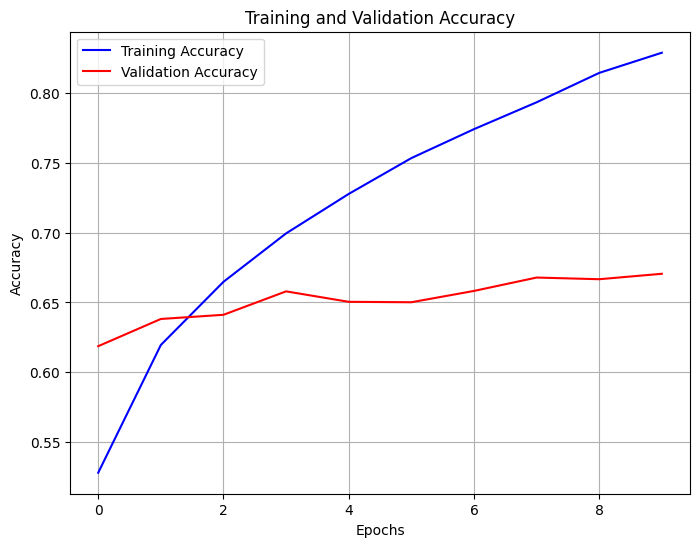

In [10]:
ModelUtilities.plot_training_history(history_dict)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


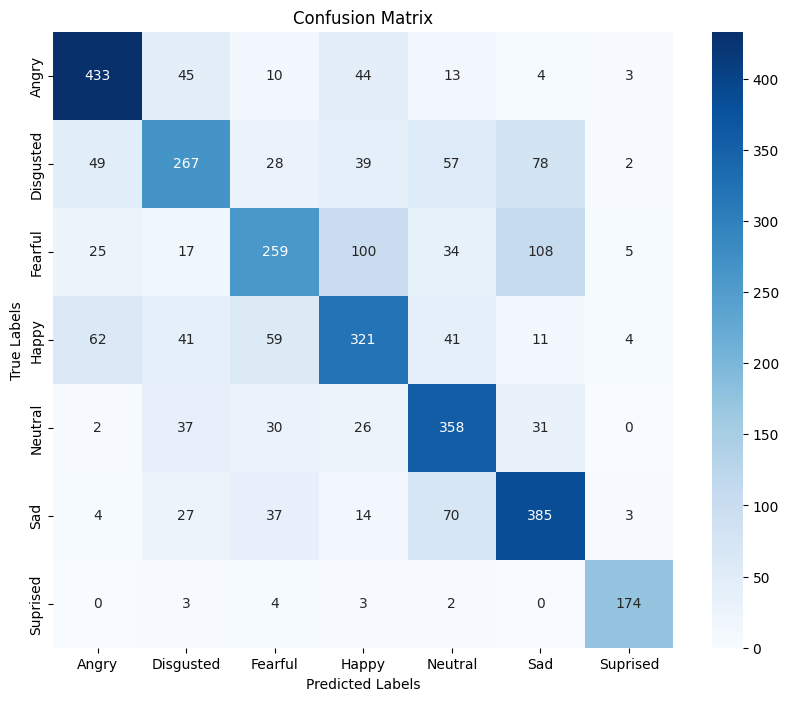

In [11]:
ModelUtilities.plot_confusion_matrix(model, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


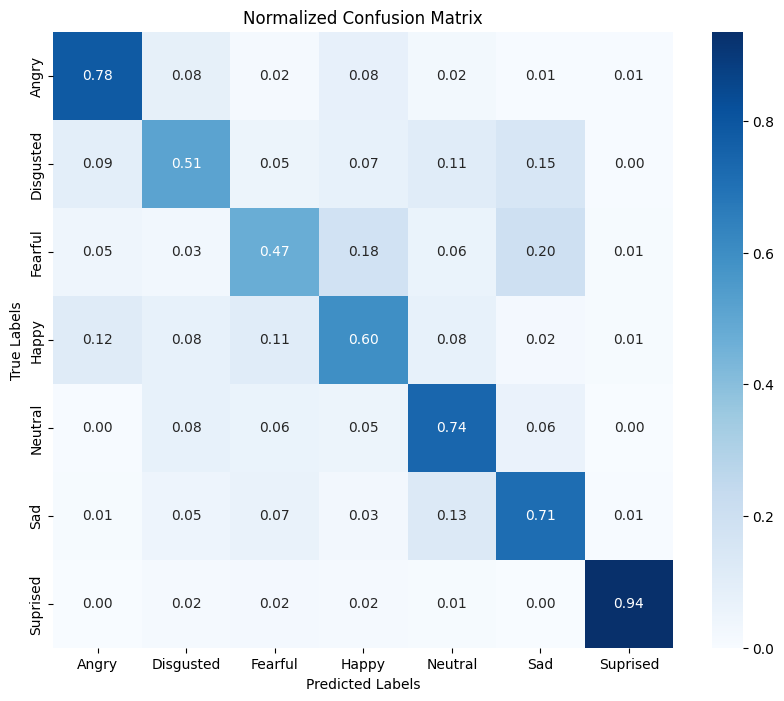

In [12]:
ModelUtilities.plot_confusion_matrix_normalized(model, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])